# Read these instructions completely in order to receive full credit

- Before you submit the problem set, make sure everything runs as expected. Go to the menu bar at the top of Jupyter Notebook and click `Kernel > Restart & Run All`. Your code should run from top to bottom with no errors. Failure to do this will result in loss of points.

- You should not use `install.packages()` anywhere. You may assume that we have already installed all the packages needed to run your code.

- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and delete the `stop()` functions. The `stop()` functions produce an error and are there to remind you of cells that need an answer.

- If you are working in a group, make sure you and your collaborators have been added to a group on Canvas as described at the beginning of lecture 2.
- As a backup, *also* fill in your uniqid as well as those of your collaborators below:

Your uniqid: `<replace with your uniqid>`

Uniqids of your collaborator(s): `<replace with their uniqids>`

- **Carefully proofread the PDF that you upload to Canvas. PDFs that have missing or truncated code cannot be graded and will not receive credit.**

---

In [8]:
library(tidyverse)
library(nycflights13)
library(Lahman)
library(babynames)
options(repr.plot.height=4, repr.plot.width=5)

# STATS 306
## Problem Set 2: `dplyr` and names
Each question is worth one to two points, for a total of 10.

## Names in baseball
In lecture we studied naming frequency over time in the Lahman data set, and wound up with this graph:

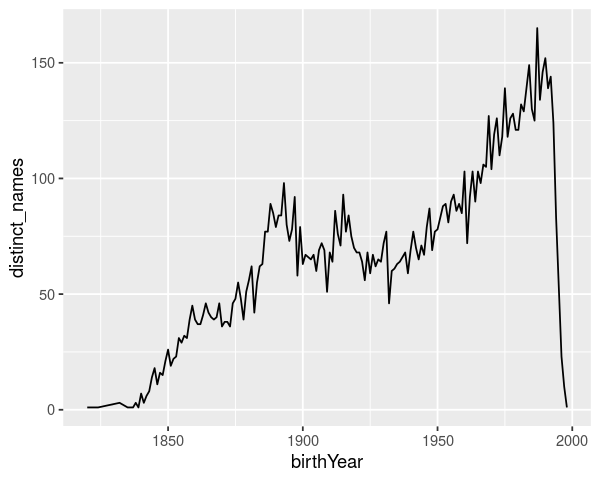

From the plot we might infer that naming diversity grew over time. But it could also be that there were more players playing baseball over time, because baseball grew in popularity. Then, this relationship could result simply because there are more players with later birth years in the data set.

#### Problem 1 (1 pt)
Check this hypothesis: create an appropriate plot which visualizes the joint distribution a) of the number of distinct (given) first names in each year and b) the number of players born in that year.

In [ ]:
# YOUR CODE HERE
stop()

#### Problem 2 (1 pt.)
Interepret the results of your plot in problem 1. Based on the data, does it seem there are more distinct names over time because a) people were choosing different names, or b) there were more players playing baseball as time went on?

YOUR ANSWER HERE

#### Problem 3 (1 pt.)
Based on your analysis in the previous two problems, construct a revised plot comparing a normalized measure of naming diversity and birth year. Your measure of naming diversity should take into account *both* the number of distinct names encountered each year, as well as the number of players who were born in that year. 

(There is more than one possible answer to this question. Pick a strategy you think is appropriate.)

In [ ]:
# YOUR CODE HERE
stop()

Interpret your results.

YOUR ANSWER HERE

## Social security names database
The next four problems look at a different data set of [names from the Social Security Administration](https://www.ssa.gov/oact/babynames/).

In [2]:
library(babynames)
print(as_tibble(babynames))

# A tibble: 1,924,665 x 5
    year sex   name          n   prop
   <dbl> <chr> <chr>     <int>  <dbl>
 1  1880 F     Mary       7065 0.0724
 2  1880 F     Anna       2604 0.0267
 3  1880 F     Emma       2003 0.0205
 4  1880 F     Elizabeth  1939 0.0199
 5  1880 F     Minnie     1746 0.0179
 6  1880 F     Margaret   1578 0.0162
 7  1880 F     Ida        1472 0.0151
 8  1880 F     Alice      1414 0.0145
 9  1880 F     Bertha     1320 0.0135
10  1880 F     Sarah      1288 0.0132
# … with 1,924,655 more rows


#### Problem 4 (2 pts)
The most common name each year is:

In [3]:
group_by(babynames, year, sex) %>% top_n(1) %>% print

Selecting by prop


# A tibble: 276 x 5
# Groups:   year, sex [276]
    year sex   name      n   prop
   <dbl> <chr> <chr> <int>  <dbl>
 1  1880 F     Mary   7065 0.0724
 2  1880 M     John   9655 0.0815
 3  1881 F     Mary   6919 0.0700
 4  1881 M     John   8769 0.0810
 5  1882 F     Mary   8148 0.0704
 6  1882 M     John   9557 0.0783
 7  1883 F     Mary   8012 0.0667
 8  1883 M     John   8894 0.0791
 9  1884 F     Mary   9217 0.0670
10  1884 M     John   9388 0.0765
# … with 266 more rows


We see that Mary and John were extremely popular names in the late 19th century.

Call a name *timeless* if it is among the most 30 common names for its gender in *every* year of data. 

John is timeless, although Mary is not. Including John there are four timeless boy names, and one timeless girl name. What are they?

In [ ]:
# YOUR CODE HERE
stop()

#### Problem 5 (2 pts.)
Some names experience a sudden surge in popularity. For example, consider the frequency of the name Arya over the past 30 years:

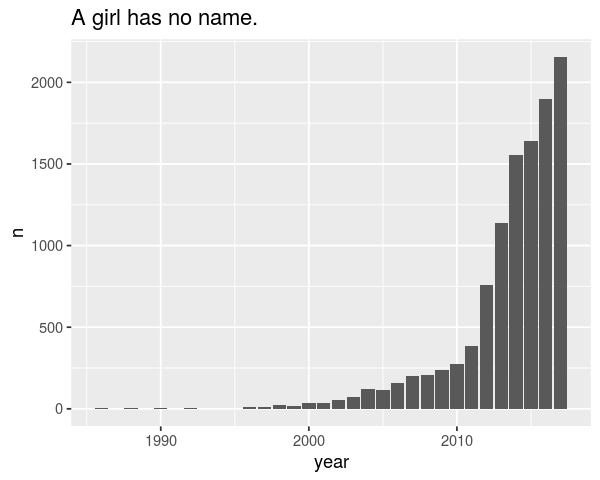

In [4]:
filter(babynames, name == "Arya", sex == "F") %>% ggplot + 
    geom_col(aes(x=year, y=n)) + ggtitle("A girl has no name.")

(Why?)

A few names have risen or fallen in popularity even more steeply. Define the *year-on-year change* to be the difference in naming proportion for a given name from one year to the next. For example, from 1946 to 1947,
the name Linda increased in frequency by over 2%:

In [5]:
filter(babynames, sex == "F", name == "Linda", between(year, 1946, 1947))

year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1946,F,Linda,52711,0.03268200
1947,F,Linda,99686,0.05483812


This is the largest (in percentage terms) year-on-year change in the data set. 

Two other names changed by more than 1% between one year and the next. What were they?

(*Hint*: to solve this problem, you will want to use the [`lag()` function](https://dplyr.tidyverse.org/reference/lead-lag.html). Pay close attention to how your analysis handles boundaries between one name and the next in the `babynames` table.)

In [ ]:
# YOUR CODE HERE
stop()

## Challenge Problem

In this problem, you will test whether the proportion of baby names ending in the letter "o" changed from decade to decade.

Because we have not yet learned how to parse strings, or lump years into decades (easily; you could bang it out with `ifelse()`), 
the code needed to generate the necessary columns is provided for you:

In [6]:
babynames %>% mutate(
    ends_in_o = stringr::str_detect(name, "o$"),
    decade = str_c(year %/% 10 * 10, "-", year %/% 10 * 10 + 9)) %>% print

# A tibble: 1,924,665 x 7
    year sex   name          n   prop ends_in_o decade   
   <dbl> <chr> <chr>     <int>  <dbl> <lgl>     <chr>    
 1  1880 F     Mary       7065 0.0724 FALSE     1880-1889
 2  1880 F     Anna       2604 0.0267 FALSE     1880-1889
 3  1880 F     Emma       2003 0.0205 FALSE     1880-1889
 4  1880 F     Elizabeth  1939 0.0199 FALSE     1880-1889
 5  1880 F     Minnie     1746 0.0179 FALSE     1880-1889
 6  1880 F     Margaret   1578 0.0162 FALSE     1880-1889
 7  1880 F     Ida        1472 0.0151 FALSE     1880-1889
 8  1880 F     Alice      1414 0.0145 FALSE     1880-1889
 9  1880 F     Bertha     1320 0.0135 FALSE     1880-1889
10  1880 F     Sarah      1288 0.0132 FALSE     1880-1889
# … with 1,924,655 more rows


#### Problem 6 (1 pt.)
Plot the percentage of babies whose name ends in 'o' by decade:
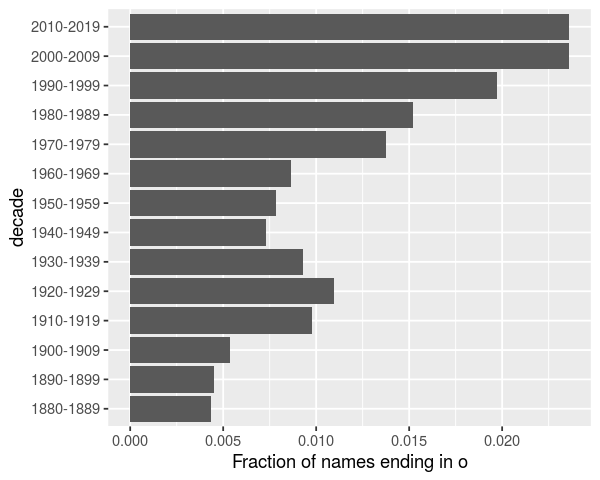

In [ ]:
# YOUR CODE HERE
stop()

#### Problem 7 (2 pts.)
In STATS 250 you [learned how to test for differences in population proportions](https://open.umich.edu/sites/default/files/downloads/stats_250_full_lecture_notes_with_r_fall_2015_0.pdf). To do so in R we use the command `prop.test()`. For example, if I flip one coin 30 times and see 20 heads, and a second coin 12 times and see 3 heads, then

In [7]:
prop.test(x = c(20, 3), n = c(30, 12))


	2-sample test for equality of proportions with continuity correction

data:  c(20, 3) out of c(30, 12)
X-squared = 4.4427, df = 1, p-value = 0.03505
alternative hypothesis: two.sided
95 percent confidence interval:
 0.06088074 0.77245259
sample estimates:
   prop 1    prop 2 
0.6666667 0.2500000 


tells me that there is a significant difference in the success probabilities of the two coins at the 5% level, though not at the 1% level (p-value 0.035).

From the preceding exercise, it seems like the fraction of babies with names ending in `o` grew substantially in the 21st century. Check this by testing whether the proportion of such babies born between 1980 and 1999 (inclusive) is different from the proportion from the year 2000 onwards. (*Hint*: there were 1,594,457 born in 2000 or later whose name ends in `o`.) 

In [ ]:
# YOUR CODE HERE
stop()

Interpret your result. What is driving this change? How do these data support that conclusion?

YOUR ANSWER HERE